In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/content/drive/MyDrive/CSCI596/carbon_nanotubes.csv', sep=';', delimiter=',')

In [3]:
data.head(5)

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [4]:
data.describe()

,Chiral indice n,Chiral indice m
count,10721.000000,10721.000000
mean,8.225725,3.337189
std,2.138919,1.683881
min,2.000000,1.000000
25%,7.000000,2.000000
50%,8.000000,3.000000
75%,10.000000,5.000000
max,12.000000,6.000000


In [5]:
# add index combination n/m
data['Chiral_nm'] = data['Chiral indice n'].map(str) + '/' + data['Chiral indice m'].map(str)

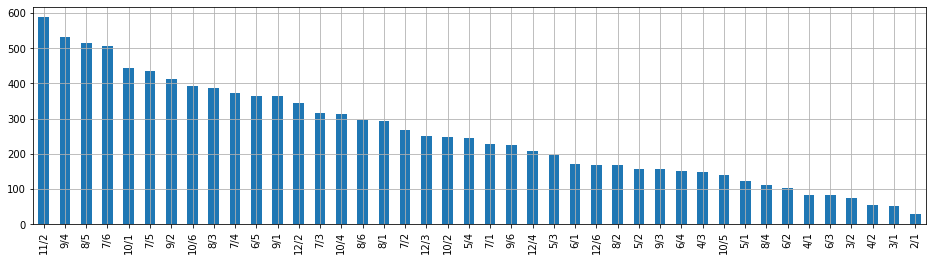

In [6]:
# and show frequency plot
plt.figure(figsize=(16,4))
data['Chiral_nm'].value_counts().plot(kind='bar')
plt.grid()
plt.show()

In [7]:
# "shortcut" for column names
cu = "Calculated atomic coordinates u'"
cv = "Calculated atomic coordinates v'"
cw = "Calculated atomic coordinates w'"

iu = "Initial atomic coordinate u"
iv = "Initial atomic coordinate v"
iw = "Initial atomic coordinate w"

In [8]:
# plot full data
fig = px.scatter_3d(data, x=cu, y=cv, z=cw,
                    color='Chiral indice n',
                    size='Chiral indice m',
                    hover_data=[],
                    opacity=0.5)
fig.update_layout(title='Calculated atomic coordinates')
fig.show()

In [9]:
# select a specific subset
sel = '11/2'
df_select = data[data.Chiral_nm==sel]

fig = px.scatter_3d(df_select, x=cu, y=cv, z=cw,
                    color='Chiral indice n',
                    size='Chiral indice m',
                    hover_data=[],
                    opacity=0.5)
fig.update_layout(title='Calculated atomic coordinates - Index '+sel)
fig.show()

In [10]:
# select by chiral index n
sel_n = 12
df_select = data[data['Chiral indice n']==sel_n]

fig = px.scatter_3d(df_select, x=cu, y=cv, z=cw,
                    color='Chiral indice m', 
                    hover_data=[],
                    opacity=0.5)
fig.update_layout(title='Calculated atomic coordinates - n='+str(sel_n))
fig.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

In [12]:
# Data Preprocessing

data = pd.read_csv('/content/drive/MyDrive/CSCI596/carbon_nanotubes.csv', sep=';', delimiter=',')

train_data = data.iloc[:,:-3].values
result_label = data.iloc[:,5:].values

for i in range(len(train_data)):
  for j in range(len(train_data[i])):
    if type(train_data[i][j]) == str:
      train_data[i][j] = train_data[i][j].replace(',','.')

for i in range(len(result_label)):
  for j in range(len(result_label[i])):
    if type(result_label[i][j]) == str:
      result_label[i][j] = result_label[i][j].replace(',','.')

train_data = train_data.astype(np.float)
result_label = result_label.astype(np.float)

train_data, test_data, train_label, test_label = train_test_split(train_data, result_label, test_size = 0.2, random_state = 42)



In [13]:
# Train linear regression model
train_start_time = time.time()
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_data, train_label)
train_end_time = time.time()
train_time = train_end_time - train_start_time

In [14]:
# Predict test result using linear regression model
predict_start_time = time.time()
predict_label = linear_regression_model.predict(test_data)
predict_end_time = time.time()
predict_time = predict_end_time - predict_start_time

# Evaluate result
print("Linear Regression")
lr_r2 = r2_score(test_label, predict_label)
lr_mse = mean_squared_error(test_label, predict_label)
lr_mae = mean_absolute_error(test_label, predict_label)

print("R2 score: %lr_r2" % lr_r2)
print("mean squared error score: %lr_mse" % lr_mse)
print("mean absolute error score: %lr_mae" % lr_mae)
print("train time: {}".format(train_time))
print("predict time: {}".format(predict_time))

Linear Regression
R2 score: 0.9994742385656261_r2
mean squared error score: 4.400411347567924e-05_mse
mean absolute error score: 0.0019416155566462853_mae
train time: 0.02838611602783203
predict time: 0.0008168220520019531


In [15]:
# neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size = 0.2) 

train_start_time = time.time()
nn_model = Sequential()
nn_model.add(Dense(30, input_shape = (5,), activation='softmax'))
nn_model.add(Dense(30, activation = 'ReLU'))
nn_model.add(Dense(30, activation = 'softmax'))
nn_model.add(Dense(30, activation = 'softmax'))
nn_model.add(Dense(3, activation=None))

nn_model.compile(Adam(lr = 0.0012),'mean_squared_error')
model_run = nn_model.fit(train_data,
          train_label,
          validation_data=(val_data, val_label),
          epochs=150)

train_end_time = time.time()
train_time = train_end_time - train_start_time

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/150
215/215 [==============================] - 1s 3ms/step - loss: 0.1542 - val_loss: 0.0871
Epoch 2/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0831 - val_loss: 0.0754
Epoch 3/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0642 - val_loss: 0.0518
Epoch 4/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0478 - val_loss: 0.0453
Epoch 5/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.0440
Epoch 6/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0435 - val_loss: 0.0431
Epoch 7/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0430 - val_loss: 0.0426
Epoch 8/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0427 - val_loss: 0.0424
Epoch 9/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.0423
Epoch 10/150
215/215 [==============================] - 0s 2ms/step - loss: 0.0424 - val_lo

In [16]:
predict_start_time = time.time()
predict_label = nn_model.predict(test_data)
nn_r2 = r2_score(test_label, predict_label)
predict_end_time = time.time()
predict_time = predict_end_time - predict_start_time

# Evaluate result
print("Neural network")
nn_r2 = r2_score(test_label, predict_label)
nn_mse = mean_squared_error(test_label, predict_label)
nn_mae = mean_absolute_error(test_label, predict_label)

print("R2 score: %lr_r2" % nn_r2)
print("mean squared error score: %lr_mse" % nn_mse)
print("mean absolute error score: %lr_mae" % nn_mae)
print("train time: {}".format(train_time))
print("predict time: {}".format(predict_time))

Neural network
R2 score: 0.9986884660603076_r2
mean squared error score: 0.00010996230780009402_mse
mean absolute error score: 0.007239330019269664_mae
train time: 72.4724555015564
predict time: 0.2628498077392578


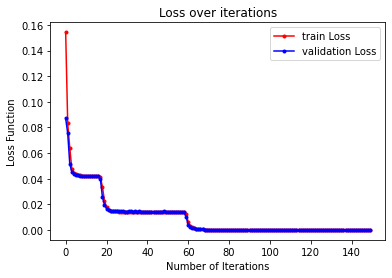

In [17]:
# plot losses for neural network model

fig, ax = plt.subplots()
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Function');

ax.set_title('Loss over iterations')
ax.plot(model_run.history["loss"],'r', marker='.', label="train Loss")
ax.plot(model_run.history["val_loss"],'b', marker='.', label="validation Loss")
ax.legend()